In [136]:
# TODO list out which measures require excess returns - seems to be everything except drawdown.
# TODO include benchmark in multifactor FF regression -  actually this kind of already happens, it just isn't shown
# TODO remove pyfolio VaR
# TODO rename Sharpe to annual Sharpe - or replace with the one from utils (Sharpe perhaps shouldn)
# TODO replace beta and alpha (appear to be wrong) - actually no the beta is the same and the alpha is annualised
# TODO mark alpha as annualised
# TODO watch out for his Burke ratio, he forgot to express his drawdowns in decimal form
# TODO replace drawdown

In [2]:
# note: pandas corrects for bias in skew and kurtosis, and by default subtracts 3 from kurtosis (so it's excess kurtosis)

In [1]:
import pyfolio_fork_aprm as pf

In [2]:
import utils

In [3]:
import empyrical as ep
import scipy

In [83]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [178]:
# old stuff
# two_returns = pd.read_excel('../../Econometrics of Financial Markets/returns.xlsx', 
#                         usecols=[0, 1, 3], 
#                         index_col=0, 
#                         parse_dates=[0]).pct_change().dropna()
# two_returns.index = two_returns.index.tz_localize('UTC')
# returns = two_returns['Disney']
# benchmark = two_returns['SP500 (Rm)']

In [8]:
returns_df = utils.get_returns_df()

In [11]:
rf = utils.get_risk_free_returns_series(returns_df)

In [ ]:
def get_stats_from_fund_obj(fund, returns_df, risk_free_returns):
    returns_series = returns_df[fund.name].dropna()
    index_returns = returns_df[fund.index_benchmark]
    return get_full_perf_stats(returns_series, risk_free_returns, index_returns)

In [89]:
pd.DataFrame(funds)

,name,passive_alternative,index_benchmark
0,JFUAX,BWIIX,MXWO
1,JLCAX,BSPIX,SPX
2,JDEAX,BSPIX,SPX
3,OEIAX,MAIIX,MXEA
4,JFTAX,MAIIX,MXEA


In [59]:
ff = ep.utils.load_portfolio_risk_factors(start=returns_df.index[0], end=returns_df.index[-1])

In [50]:
# All measures are calculated using daily returns data, and are not annualised unless explicitly stated

In [9]:
pf.timeseries.gen_drawdown_table(returns, top=5)

C:\Users\Kevin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,16.3242,2017-04-27,2017-10-12,NaT,NaN
1,2.06649,2017-02-01,2017-02-07,2017-03-13,29
2,0.949564,2017-04-20,2017-04-24,2017-04-25,4
3,0.851743,2017-03-20,2017-03-21,2017-03-28,7
4,0.846635,2017-03-31,2017-04-10,2017-04-17,12


In [7]:
# check equal to downside risk from empyrical
print(np.sqrt(utils.lpm(returns, target_rate=0, order=2)) * np.sqrt(252))
downside_risk_annualised = ep.downside_risk(returns)
downside_risk_annualised

0.11028980397350972


0.11028980397350972

In [8]:
daily_expected_shortfall = utils.expected_shortfall(returns)
daily_expected_shortfall

0.006570516563209849

In [94]:
from importlib import reload
reload(utils)
import utils

df = utils.get_full_perf_stats_df(returns_df, utils.get_funds_list(), rf)

In [91]:
x = utils.get_fama_french_df(utils.get_funds_list(), returns_df)

In [93]:
type(x)

pandas.core.frame.DataFrame

In [95]:
utils.main()

C:\Users\Kevin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


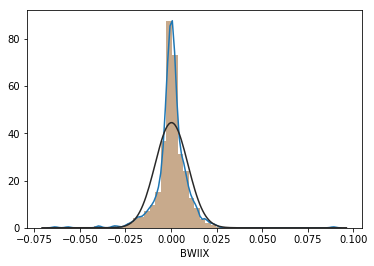

In [23]:
sns.distplot(returns_df['BWIIX'].dropna().pipe(np.log1p))
sns.distplot(returns_df['BWIIX'].dropna().pipe(np.log1p), kde=False, fit=scipy.stats.norm)

In [13]:
df

,JFUAX,JLCAX,JDEAX,OEIAX,JFTAX,BWIIX,BSPIX,MAIIX
Annual return,5.9%,7.2%,6.6%,6.1%,5.9%,6.8%,8.9%,6.0%
Cumulative returns,21.2%,26.4%,23.9%,21.9%,21.2%,21.2%,33.5%,21.8%
Volatility (annualised),15.1%,14.6%,13.7%,14.5%,14.3%,14.3%,12.8%,14.1%
Sharpe ratio (annualised),0.453922,0.547519,0.533205,0.478926,0.471944,0.530037,0.732384,0.48657
Stability,0.54759,0.700808,0.660156,0.422659,0.389605,0.813784,0.836543,0.401933
Drawdown,10.4%,11.7%,11.5%,11.4%,11.3%,9.6%,11.1%,10.5%
Omega ratio (annualised),1.08767,1.10788,1.10581,1.09364,1.09168,1.11569,1.14841,1.09437
Sortino ratio (annualised),0.619164,0.754697,0.73751,0.64354,0.629344,0.747288,1.01849,0.65517
Skew,-0.778585,-0.644868,-0.585795,-1.51459,-1.59464,0.0611801,-0.630255,-1.36244
Kurtosis,4.63507,3.87904,3.6811,14.0705,14.3966,19.2716,4.09924,11.7001


In [14]:
utils.main()

In [166]:
bwiix = utils.get_funds_list()[5]

In [199]:
utils.get_stats_from_fund_obj(bwiix, returns_df, rf)

,BWIIX
Annual return,6.8%
Cumulative returns,21.2%
Volatility (annualised),14.3%
Sharpe ratio (annualised),0.530037
Stability,0.813784
Drawdown,9.6%
Omega ratio (annualised),1.11569
Sortino ratio (annualised),0.747288
Skew,0.354188
Kurtosis,20.9716


In [95]:
scipy.stats.skew(returns)

0.0914294436500368

In [65]:
ep.sharpe_ratio(returns)

0.15012520798693332

In [58]:
utils.drawdown_alt(returns)

0.05434583510845725

In [32]:
100*returns.mean()

0.009393791874586466

In [30]:
np.sqrt(returns.resample('Y').apply(ep.max_drawdown).pow(2).mean())

0.11677844104552411

In [28]:
utils.burke_ratio(returns)

0.0008044114813045376

In [10]:
print(returns.mean() * 252 / downside_risk_annualised)
ep.sortino_ratio(returns)

0.21463775137041413


0.21463775137041413

In [89]:
ep.max_drawdown(returns)

-0.1632423744213528

In [11]:
historical_5pct_VaR = returns.quantile(0.05)
# this matches with empyrical but not with pyfolio, which returns a theoretical VaR by assuming a normal distribution

In [63]:
pf.timeseries.perf_stats(returns, factor_returns=benchmark)

Annual return          0.011358
Cumulative returns     0.011267
Annual volatility      0.157684
Sharpe ratio           0.150125
Calmar ratio           0.069578
Stability              0.210795
Max drawdown          -0.163242
Omega ratio            1.027924
Sortino ratio          0.214638
Skew                   0.091982
Kurtosis               4.805310
Tail ratio             0.869223
Daily value at risk   -0.019772
Alpha                 -0.120648
Beta                   0.614065
dtype: float64

In [141]:
ep.value_at_risk(returns)

-0.01566418126230057

In [71]:
Drawdown(returns.add(1).cumprod())

5.434583510845725

In [13]:
print((returns.mean() / returns.std()) * np.sqrt(252))
ep.sharpe_ratio(returns)

0.15012520798693332


0.15012520798693332

Note: we use sample variance (and sample kurtosis etc) because we are trying to estimate the true variance which is unknown

In [92]:
pf.plotting.show_worst_drawdown_periods(returns)

C:\Users\Kevin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,16.32,2017-04-27,2017-10-12,NaT,NaN
1,2.07,2017-02-01,2017-02-07,2017-03-13,29
2,0.95,2017-04-20,2017-04-24,2017-04-25,4
3,0.85,2017-03-20,2017-03-21,2017-03-28,7
4,0.85,2017-03-31,2017-04-10,2017-04-17,12


In [15]:
#perf.to_excel('test.xlsx', float_format='%0.2f')

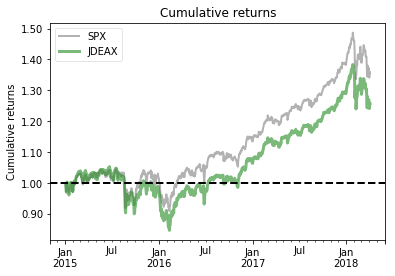

In [45]:
fig, ax = plt.subplots()
ax.set_title('Cumulative returns')
pf.plotting.plot_rolling_returns(returns_df['JDEAX'], returns_df['SPX'], backtest_label_replacement='JDEAX', ax=ax)

In [196]:
ep.beta(returns_df['JDEAX'], returns_df['SPX'])

1.0549715982506067

In [18]:
# skip volatility matching
#pf.plotting.plot_rolling_returns(returns, benchmark, volatility_match=True)

In [19]:
# skip plot of returns - who cares?
# pf.plotting.plot_returns(returns)

In [41]:
utils.get_funds_list()

[Fund(name='JFUAX', passive_alternative='BWIIX', index_benchmark='MXWO'),
 Fund(name='JLCAX', passive_alternative='BSPIX', index_benchmark='SPX'),
 Fund(name='JDEAX', passive_alternative='BSPIX', index_benchmark='SPX'),
 Fund(name='OEIAX', passive_alternative='MAIIX', index_benchmark='MXEA'),
 Fund(name='JFTAX', passive_alternative='MAIIX', index_benchmark='MXEA'),
 Fund(name='BWIIX', passive_alternative=None, index_benchmark='MXWO'),
 Fund(name='BSPIX', passive_alternative=None, index_benchmark='SPX'),
 Fund(name='MAIIX', passive_alternative=None, index_benchmark='MXEA')]

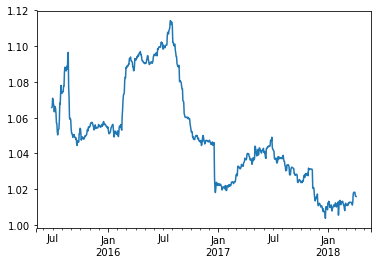

In [40]:
pf.timeseries.rolling_beta(returns_df['JDEAX'], returns_df['SPX']).plot()

In [28]:
utils.get_funds_list()

[Fund(name='JFUAX', passive_alternative='BWIIX', index_benchmark='MXWO'),
 Fund(name='JLCAX', passive_alternative='BSPIX', index_benchmark='SPX'),
 Fund(name='JDEAX', passive_alternative='BSPIX', index_benchmark='SPX'),
 Fund(name='OEIAX', passive_alternative='MAIIX', index_benchmark='MXEA'),
 Fund(name='JFTAX', passive_alternative='MAIIX', index_benchmark='MXEA'),
 Fund(name='BWIIX', passive_alternative=None, index_benchmark='MXWO'),
 Fund(name='BSPIX', passive_alternative=None, index_benchmark='SPX'),
 Fund(name='MAIIX', passive_alternative=None, index_benchmark='MXEA')]

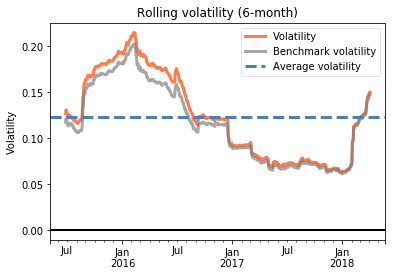

In [42]:
pf.plotting.plot_rolling_volatility(returns_df['JDEAX'], returns_df['SPX'])

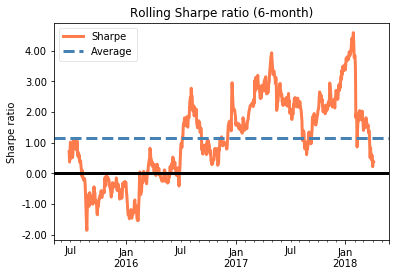

In [189]:
pf.plotting.plot_rolling_sharpe(returns_df['JDEAX'])

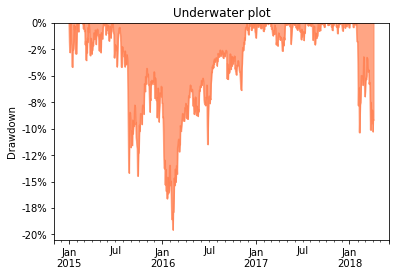

In [46]:
pf.plotting.plot_drawdown_underwater(returns_df['JDEAX'])

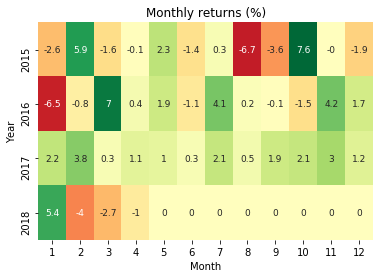

In [47]:
pf.plotting.plot_monthly_returns_heatmap(returns_df['JDEAX'])

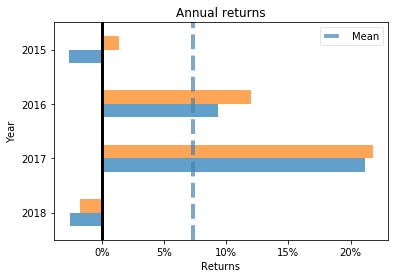

In [51]:
pf.plotting.plot_annual_returns(returns_df[['JDEAX', 'SPX']])

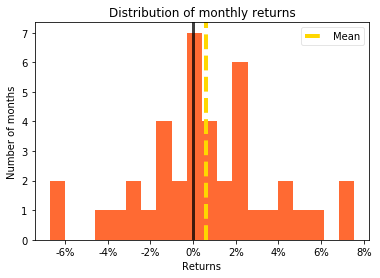

In [57]:
pf.plotting.plot_monthly_returns_dist(returns_df['JDEAX'])

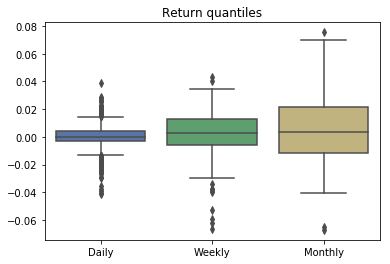

In [50]:
pf.plotting.plot_return_quantiles(returns_df['JDEAX'])

In [84]:
def summary(fit_list):
    return summary_col(fit_list, 
                       float_format='%0.4f', 
                       info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)), 
                                  'R2':lambda x: "{:.4f}".format(x.rsquared)},stars=True
                      ).tables[0]

In [85]:
summary([fama_french_regression(returns_df['JDEAX'], returns_df['SPX'], ff)])

,JDEAX_excess_returns
Intercept,-0.0001***
,(0.0000)
SPX_excess_returns,1.0551***
,(0.0083)
SMB,0.0369***
,(0.0092)
HML,-0.0277***
,(0.0107)
Mom,-0.0117*
,(0.0067)


In [177]:
#x = pf.create_returns_tear_sheet(returns, benchmark_rets=benchmark, live_start_date=returns.index[-1], return_fig=True)